In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import entropy

## Data Cleaning and Processing

### Restaurants in NYC

In [2]:
nyc_restaurant = pd.read_csv('all_nyc_restaurants.csv')

In [3]:
nyc_restaurant

,place_id,name,address,latitude,longitude,rating,user_ratings_total,price_level,all_types,search_type,...,specific_types,popularity_score,formatted_address,formatted_phone_number,website,opening_hours_text,detail_types,specific_type_1,specific_type_2,specific_type_3
0,ChIJ_U_NR69ZwokRkOaA92AjJ4U,Kimpton Hotel Eventi,"851 6th Avenue, New York",40.747022,-73.990033,4.4,1996,3,"[""lodging"", ""restaurant"", ""food"", ""point_of_in...",restaurant,...,NaN,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChIJmU5P6vBYwokRO73p8vAMXUE,Park Lane Hotel New York,"36 Central Park South South, New York",40.765073,-73.975263,4.0,2987,0,"[""bar"", ""lodging"", ""restaurant"", ""food"", ""poin...",restaurant,...,NaN,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ChIJAS6GeVVYwokRPfg8xt4nH-I,Connolly's,"121 West 45th Street, New York",40.757368,-73.983580,4.4,4616,2,"[""bar"", ""restaurant"", ""food"", ""point_of_intere...",restaurant,...,NaN,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ChIJM6NLWapZwokR5Gj7tgBAfWo,Oohu Szechuan & Canton Cuisines,"128 West 36th Street, New York",40.751476,-73.988352,4.5,1293,2,"[""restaurant"", ""food"", ""point_of_interest"", ""e...",chinese_restaurant,...,NaN,4500.0,"128 W 36th St., New York, NY 10018, USA",(212) 575-8899,https://www.oohunyc.com/,"[""Monday: 11:00\u202fAM\u2009\u2013\u200910:00...","[""restaurant"", ""food"", ""point_of_interest"", ""e...",NaN,NaN,NaN
4,ChIJR9So-lRYwokRX1xEjA0rChA,Carmine's - Time Square,"200 West 44th Street, New York",40.757498,-73.986654,4.5,17249,2,"[""restaurant"", ""food"", ""point_of_interest"", ""e...",italian_restaurant,...,NaN,4500.0,"200 W 44th St, New York, NY 10036, USA",(212) 221-3800,https://www.carminesnyc.com/?olonwp=JjBtp_vMLk...,"[""Monday: 11:30\u202fAM\u2009\u2013\u200911:00...","[""restaurant"", ""point_of_interest"", ""food"", ""e...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,ChIJh92_xGtLwokRnTHUjjolNXE,Italian Touch Pizza & Pasta,"1547 Arthur Kill Rd, Staten Island",40.563148,-74.191690,4.5,169,2,"[""meal_delivery"", ""meal_takeaway"", ""restaurant...",pizza_restaurant,...,"pizza_restaurant, hamburger_restaurant",760.5,NaN,NaN,NaN,NaN,NaN,pizza_restaurant,hamburger_restaurant,NaN
5018,ChIJVW_9Xiq1w4kR4OXpsBkvclA,Rossville Pizza,"960 Bloomingdale Rd, Staten Island",40.549332,-74.221177,4.4,373,1,"[""meal_takeaway"", ""restaurant"", ""food"", ""point...",pizza_restaurant,...,pizza_restaurant,1641.2,NaN,NaN,NaN,NaN,NaN,pizza_restaurant,NaN,NaN
5019,ChIJtYIQlelKwokRKVK_qO2XY04,Ciro Pizza Cafe,"862 Huguenot Ave, Staten Island",40.533306,-74.192772,4.1,545,2,"[""meal_delivery"", ""restaurant"", ""food"", ""point...",pizza_restaurant,...,"pizza_restaurant, hamburger_restaurant",2234.5,NaN,NaN,NaN,NaN,NaN,pizza_restaurant,hamburger_restaurant,NaN
5020,ChIJVc09VJ9LwokRSTGt9e52wx4,Tony's Best Pizza & Pasta,"1547 Arthur Kill Rd, Staten Island",40.564052,-74.191806,4.3,16,0,"[""meal_delivery"", ""restaurant"", ""food"", ""point...",pizza_restaurant,...,"pizza_restaurant, hamburger_restaurant",68.8,NaN,NaN,NaN,NaN,NaN,pizza_restaurant,hamburger_restaurant,NaN


In [4]:
nyc_restaurant.columns

Index(['place_id', 'name', 'address', 'latitude', 'longitude', 'rating',
       'user_ratings_total', 'price_level', 'all_types', 'search_type', 'area',
       'business_status', 'photos', 'all_search_types', 'regional_types',
       'primary_cuisine', 'specific_types', 'popularity_score',
       'formatted_address', 'formatted_phone_number', 'website',
       'opening_hours_text', 'detail_types', 'specific_type_1',
       'specific_type_2', 'specific_type_3'],
      dtype='object')

In [5]:
nyc_restaurant = nyc_restaurant[['place_id', 'name', 'address', 'latitude', 'longitude', 'rating',
                                'user_ratings_total', 'price_level', 'area', 'regional_types','specific_types',
                                'specific_type_1','specific_type_2', 'specific_type_3']]

nyc_restaurant.head()

,place_id,name,address,latitude,longitude,rating,user_ratings_total,price_level,area,regional_types,specific_types,specific_type_1,specific_type_2,specific_type_3
0,ChIJ_U_NR69ZwokRkOaA92AjJ4U,Kimpton Hotel Eventi,"851 6th Avenue, New York",40.747022,-73.990033,4.4,1996,3,Manhattan Midtown,NaN,NaN,NaN,NaN,NaN
1,ChIJmU5P6vBYwokRO73p8vAMXUE,Park Lane Hotel New York,"36 Central Park South South, New York",40.765073,-73.975263,4.0,2987,0,Manhattan Midtown,NaN,NaN,NaN,NaN,NaN
2,ChIJAS6GeVVYwokRPfg8xt4nH-I,Connolly's,"121 West 45th Street, New York",40.757368,-73.983580,4.4,4616,2,Manhattan Midtown,NaN,NaN,NaN,NaN,NaN
3,ChIJM6NLWapZwokR5Gj7tgBAfWo,Oohu Szechuan & Canton Cuisines,"128 West 36th Street, New York",40.751476,-73.988352,4.5,1293,2,Manhattan Midtown,chinese_restaurant,NaN,NaN,NaN,NaN
4,ChIJR9So-lRYwokRX1xEjA0rChA,Carmine's - Time Square,"200 West 44th Street, New York",40.757498,-73.986654,4.5,17249,2,Manhattan Midtown,italian_restaurant,NaN,NaN,NaN,NaN


In [6]:
# Assuming your restaurant data is stored in a DataFrame called nyc_restaurant
filtered_restaurants = nyc_restaurant[
    (nyc_restaurant['regional_types'].notna()) |
    (nyc_restaurant['specific_types'].notna()) 
]

print(nyc_restaurant.shape)
print(filtered_restaurants.shape)

(5022, 14)
(4636, 14)


In [7]:
filtered_restaurants.head()

,place_id,name,address,latitude,longitude,rating,user_ratings_total,price_level,area,regional_types,specific_types,specific_type_1,specific_type_2,specific_type_3
3,ChIJM6NLWapZwokR5Gj7tgBAfWo,Oohu Szechuan & Canton Cuisines,"128 West 36th Street, New York",40.751476,-73.988352,4.5,1293,2,Manhattan Midtown,chinese_restaurant,NaN,NaN,NaN,NaN
4,ChIJR9So-lRYwokRX1xEjA0rChA,Carmine's - Time Square,"200 West 44th Street, New York",40.757498,-73.986654,4.5,17249,2,Manhattan Midtown,italian_restaurant,NaN,NaN,NaN,NaN
6,ChIJR9legAFZwokRa1s5gcFXPZw,Grand Central Oyster Bar,"89 East 42nd Street, New York",40.752482,-73.977431,4.2,4267,2,Manhattan Midtown,NaN,seafood_restaurant,seafood_restaurant,NaN,NaN
7,ChIJzz-PyFVYwokRwp5z0KduYls,Blue Fin,"1567 Broadway, New York",40.759376,-73.985325,4.2,1068,3,Manhattan Midtown,NaN,seafood_restaurant,seafood_restaurant,NaN,NaN
8,ChIJhXAgf1NYwokRBzdqc2TRX_I,Shake Shack Theater District,"691 8th Avenue, New York",40.758410,-73.989219,4.4,14287,2,Manhattan Midtown,NaN,hamburger_restaurant,hamburger_restaurant,NaN,NaN


In [8]:
filtered_restaurants['regional_types'].unique()

array(['chinese_restaurant', 'italian_restaurant', nan,
       'spanish_restaurant', 'french_restaurant', 'mexican_restaurant',
       'japanese_restaurant', 'chinese_restaurant, indonesian_restaurant',
       'chinese_restaurant, japanese_restaurant',
       'chinese_restaurant, indian_restaurant, indonesian_restaurant',
       'chinese_restaurant, korean_restaurant',
       'chinese_restaurant, thai_restaurant',
       'mexican_restaurant, spanish_restaurant',
       'mexican_restaurant, spanish_restaurant, indonesian_restaurant',
       'japanese_restaurant, indonesian_restaurant', 'indian_restaurant',
       'indian_restaurant, afghani_restaurant', 'greek_restaurant',
       'greek_restaurant, mediterranean_restaurant',
       'greek_restaurant, mediterranean_restaurant, lebanese_restaurant',
       'greek_restaurant, middle_eastern_restaurant, mediterranean_restaurant',
       'greek_restaurant, middle_eastern_restaurant, mediterranean_restaurant, turkish_restaurant',
       'gree

In [9]:
filtered_restaurants['regional_types'] = filtered_restaurants['regional_types'].str.split(',').str[0]
filtered_restaurants['regional_types'].unique()

/var/folders/78/73hgkmn13jjcw_dhfbc0tf4h0000gn/T/ipykernel_53759/943497476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_restaurants['regional_types'] = filtered_restaurants['regional_types'].str.split(',').str[0]


array(['chinese_restaurant', 'italian_restaurant', nan,
       'spanish_restaurant', 'french_restaurant', 'mexican_restaurant',
       'japanese_restaurant', 'indian_restaurant', 'greek_restaurant',
       'thai_restaurant', 'vietnamese_restaurant', 'korean_restaurant',
       'middle_eastern_restaurant', 'mediterranean_restaurant',
       'lebanese_restaurant', 'turkish_restaurant',
       'brazilian_restaurant', 'african_restaurant', 'afghani_restaurant',
       'indonesian_restaurant'], dtype=object)

### MTA

#### Stations

In [10]:
mta_stations = pd.read_csv("transit/MTA_Subway_Stations.csv")
mta_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,40.775036,-73.912034,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,40.770258,-73.917843,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,40.766779,-73.921479,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,N W,Elevated,40.761820,-73.925508,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,N W,Elevated,40.756804,-73.929575,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804)


In [11]:
mta_stations.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')

In [12]:
mta_stations['Daytime Routes'] = mta_stations['Daytime Routes'].str.split()
mta_stations['route_count'] = mta_stations['Daytime Routes'].apply(len) 
mta_stations['CBD_binary'] = mta_stations['CBD'].astype(int)

In [13]:
mta_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference,route_count,CBD_binary
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,-73.912034,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036),2,0
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,-73.917843,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258),2,0
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,-73.921479,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779),2,0
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,-73.925508,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182),2,0
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,-73.929575,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804),2,0


#### Riderships

In [14]:
ridership_2024 = pd.read_csv("transit/MTA_Subway_Hourly_Ridership_24.csv")
ridership_2024.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year
0,2024-01-01 00:00:00,subway,369,Elder Av (6),Bronx,metrocard,Metrocard - Unlimited 30-Day,2,0,40.828583,-73.879160,POINT (-73.87916 40.828583),2024
1,2024-01-01 00:00:00,subway,43,Parkside Av (Q),Brooklyn,metrocard,Metrocard - Other,2,0,40.655293,-73.961494,POINT (-73.961494 40.655293),2024
2,2024-01-01 00:00:00,subway,423,"Allerton Av (2,5)",Bronx,metrocard,Metrocard - Unlimited 7-Day,2,0,40.865463,-73.867355,POINT (-73.867355 40.865463),2024
3,2024-01-01 00:00:00,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 7-Day,3,0,40.645100,-73.948960,POINT (-73.94896 40.6451),2024
4,2024-01-01 00:00:00,subway,157,"96 St (C,B)",Manhattan,metrocard,Metrocard - Seniors & Disability,3,0,40.791640,-73.964700,POINT (-73.9647 40.79164),2024


In [15]:
ridership_2023 = pd.read_csv("transit/MTA_Subway_Hourly_Ridership_23.csv")
ridership_2023.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year
0,2023-01-01 00:00:00,subway,240,"7 Av (F,G)",Brooklyn,metrocard,Metrocard - Full Fare,46,1,40.666270,-73.98031,POINT (-73.98031 40.66627),2023
1,2023-01-01 00:00:00,subway,164,"34 St-Penn Station (A,C,E)",Manhattan,metrocard,Metrocard - Other,33,0,40.752290,-73.99339,POINT (-73.99339 40.75229),2023
2,2023-01-01 00:00:00,subway,453,82 St-Jackson Hts (7),Queens,omny,OMNY - Full Fare,22,0,40.747658,-73.88370,POINT (-73.8837 40.747658),2023
3,2023-01-01 00:00:00,subway,9,"57 St-7 Av (N,Q,R,W)",Manhattan,metrocard,Metrocard - Seniors & Disability,13,0,40.764664,-73.98066,POINT (-73.98066 40.764664),2023
4,2023-01-01 00:00:00,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.645100,-73.94896,POINT (-73.94896 40.6451),2023


##### 2024

In [16]:
ridership_2024['date'] = pd.to_datetime(ridership_2024['transit_timestamp'])
ridership_2024['weekday'] = ridership_2024['date'].dt.weekday
ridership_2024['is_weekend'] = ridership_2024['date'].isin([5, 6])
ridership_2024['hour'] = pd.to_datetime(ridership_2024['date']).dt.hour
ridership_2024['date'] = ridership_2024['date'].dt.date

In [17]:
ridership_2024.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year,date,weekday,is_weekend,hour
0,2024-01-01 00:00:00,subway,369,Elder Av (6),Bronx,metrocard,Metrocard - Unlimited 30-Day,2,0,40.828583,-73.879160,POINT (-73.87916 40.828583),2024,2024-01-01,0,False,0
1,2024-01-01 00:00:00,subway,43,Parkside Av (Q),Brooklyn,metrocard,Metrocard - Other,2,0,40.655293,-73.961494,POINT (-73.961494 40.655293),2024,2024-01-01,0,False,0
2,2024-01-01 00:00:00,subway,423,"Allerton Av (2,5)",Bronx,metrocard,Metrocard - Unlimited 7-Day,2,0,40.865463,-73.867355,POINT (-73.867355 40.865463),2024,2024-01-01,0,False,0
3,2024-01-01 00:00:00,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Unlimited 7-Day,3,0,40.645100,-73.948960,POINT (-73.94896 40.6451),2024,2024-01-01,0,False,0
4,2024-01-01 00:00:00,subway,157,"96 St (C,B)",Manhattan,metrocard,Metrocard - Seniors & Disability,3,0,40.791640,-73.964700,POINT (-73.9647 40.79164),2024,2024-01-01,0,False,0


In [18]:
# Aggregate hourly data to daily level
daily_ridership_2024 = ridership_2024.groupby(['station_complex_id', 'date','is_weekend'])['ridership'].sum().reset_index()
daily_ridership_2024.head()

,station_complex_id,date,is_weekend,ridership
0,1,2024-01-01,False,3719
1,1,2024-01-02,False,10141
2,1,2024-01-03,False,11036
3,1,2024-01-04,False,11111
4,1,2024-01-05,False,10394


In [19]:
# Calculate the total riderships of each station in 2024
annual_ridership_2024 = ridership_2024.groupby(['station_complex_id', 'year'])['ridership'].sum().reset_index()
annual_ridership_2024 = annual_ridership_2024.rename(columns={'ridership': 'annual_ridership'})
annual_ridership_2024['daily_avg_ridership'] = annual_ridership_2024['annual_ridership'] / 365
annual_ridership_2024.sort_values('annual_ridership', ascending=False).head(10)


,station_complex_id,year,annual_ridership,daily_avg_ridership
367,611,2024,45946666,125881.276712
366,610,2024,33963508,93050.706849
362,607,2024,25062862,68665.375342
357,602,2024,22931355,62825.630137
385,628,2024,19305052,52890.553425
52,164,2024,18664192,51134.772603
370,614,2024,16992645,46555.191781
193,318,2024,16661226,45647.194521
372,616,2024,15123605,41434.534247
316,447,2024,14786668,40511.419178


##### 2023

In [20]:
ridership_2023['date'] = pd.to_datetime(ridership_2023['transit_timestamp'])
ridership_2023['weekday'] = ridership_2023['date'].dt.weekday  
ridership_2023['is_weekend'] = ridership_2023['date'].isin([5, 6]) 
ridership_2023['hour'] = pd.to_datetime(ridership_2023['date']).dt.hour
ridership_2023['date'] = ridership_2023['date'].dt.date

In [21]:
ridership_2023.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year,date,weekday,is_weekend,hour
0,2023-01-01 00:00:00,subway,240,"7 Av (F,G)",Brooklyn,metrocard,Metrocard - Full Fare,46,1,40.666270,-73.98031,POINT (-73.98031 40.66627),2023,2023-01-01,6,False,0
1,2023-01-01 00:00:00,subway,164,"34 St-Penn Station (A,C,E)",Manhattan,metrocard,Metrocard - Other,33,0,40.752290,-73.99339,POINT (-73.99339 40.75229),2023,2023-01-01,6,False,0
2,2023-01-01 00:00:00,subway,453,82 St-Jackson Hts (7),Queens,omny,OMNY - Full Fare,22,0,40.747658,-73.88370,POINT (-73.8837 40.747658),2023,2023-01-01,6,False,0
3,2023-01-01 00:00:00,subway,9,"57 St-7 Av (N,Q,R,W)",Manhattan,metrocard,Metrocard - Seniors & Disability,13,0,40.764664,-73.98066,POINT (-73.98066 40.764664),2023,2023-01-01,6,False,0
4,2023-01-01 00:00:00,subway,357,"Beverly Rd (2,5)",Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.645100,-73.94896,POINT (-73.94896 40.6451),2023,2023-01-01,6,False,0


In [22]:
# Aggregate hourly data to daily level
daily_ridership_2023 = ridership_2023.groupby(['station_complex_id', 'date','is_weekend'])['ridership'].sum().reset_index()
daily_ridership_2023.head()

,station_complex_id,date,is_weekend,ridership
0,1,2023-01-01,False,3851
1,1,2023-01-02,False,5245
2,1,2023-01-03,False,9753
3,1,2023-01-04,False,10430
4,1,2023-01-05,False,10710


In [23]:
# Calculate the total riderships of each station in 2023
annual_ridership_2023 = ridership_2023.groupby(['station_complex_id', 'year'])['ridership'].sum().reset_index()
annual_ridership_2023 = annual_ridership_2023.rename(columns={'ridership': 'annual_ridership'})
annual_ridership_2023.sort_values('annual_ridership', ascending=False).head(10)

,station_complex_id,year,annual_ridership
367,611,2023,43219338
366,610,2023,30796102
362,607,2023,23650045
357,602,2023,21602127
385,628,2023,17917173
52,164,2023,17123122
370,614,2023,15889241
193,318,2023,15418725
372,616,2023,14360730
316,447,2023,14026406


Choose 2023 annual ridership

In [24]:
top10_stations = annual_ridership_2023.sort_values('annual_ridership', ascending=False).head(10)
top10_stations.to_csv('transit/top10_stations.csv', index=False)

In [25]:
mta_stations.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference', 'route_count', 'CBD_binary'],
      dtype='object')

In [26]:
complex_station_counts = mta_stations.groupby('Complex ID').size().reset_index(name='stations_in_complex')

multi_station_complexes = complex_station_counts[complex_station_counts['stations_in_complex'] > 1]
print(f"found {len(multi_station_complexes)} multi-station complexes")
if len(multi_station_complexes) > 0:
    print("Multi-station Complexes:")
    print(multi_station_complexes.head())
    # View the specific stations of these multi-station complexes
    for complex_id in multi_station_complexes['Complex ID'].head():
        stations = mta_stations[mta_stations['Complex ID'] == complex_id]
        print(f"\nComplexes {complex_id} inclue stations:")
        print(stations[['Station ID', 'Stop Name']])

found 35 multi-station complexes
Multi-station Complexes:
     Complex ID  stations_in_complex
119         151                    2
132         167                    2
385         461                    2
413         601                    3
414         602                    3

Complexes 151 inclue stations:
     Station ID Stop Name
149         151    145 St
150         151    145 St

Complexes 167 inclue stations:
     Station ID       Stop Name
166         167  W 4 St-Wash Sq
167         167  W 4 St-Wash Sq

Complexes 461 inclue stations:
     Station ID         Stop Name
461         461  Queensboro Plaza
462         461  Queensboro Plaza

Complexes 601 inclue stations:
     Station ID Stop Name
115         116      6 Av
229         229     14 St
322         322     14 St

Complexes 602 inclue stations:
     Station ID       Stop Name
14           15  14 St-Union Sq
116         117  14 St-Union Sq
406         406  14 St-Union Sq


In [27]:
annual_ridership_2023 = annual_ridership_2023.rename(columns={'station_complex_id': 'Complex ID'})
complex_ridership = annual_ridership_2023.groupby('Complex ID')['annual_ridership'].mean().reset_index()
complex_ridership = annual_ridership_2023.rename(columns={'annual_ridership': 'complex_avg_ridership'})

complex_station_counts['Complex ID'] = complex_station_counts['Complex ID'].astype(str)
complex_data = complex_station_counts.merge(
    complex_ridership,
    on='Complex ID',
    how='left'
)

In [28]:
complex_data['station_avg_ridership'] = complex_data['complex_avg_ridership'] / complex_data['stations_in_complex'] 

print("\nProcessed station complex ridership data:")
complex_data


Processed station complex ridership data:


,Complex ID,stations_in_complex,year,complex_avg_ridership,station_avg_ridership
0,1,1,2023.0,3287685.0,3287685.00
1,2,1,2023.0,2360702.0,2360702.00
2,3,1,2023.0,3009491.0,3009491.00
3,4,1,2023.0,2761954.0,2761954.00
4,5,1,2023.0,1467655.0,1467655.00
...,...,...,...,...,...
440,628,4,2023.0,17917173.0,4479293.25
441,629,2,2023.0,3939401.0,1969700.50
442,630,2,2023.0,5066254.0,2533127.00
443,635,2,2023.0,6114052.0,3057026.00


In [29]:
complex_data['daily_avg_ridership'] = complex_data['station_avg_ridership'] / 365

In [30]:
mta_stations['Complex ID'] = mta_stations['Complex ID'].astype(str)
mta_stations = pd.merge(mta_stations,complex_data, how='left', on='Complex ID')
mta_stations = mta_stations.drop(columns=['complex_avg_ridership'])
mta_stations = mta_stations.rename(columns={'station_avg_ridership': 'annual_ridership'})
mta_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,ADA Northbound,ADA Southbound,ADA Notes,Georeference,route_count,CBD_binary,stations_in_complex,year,annual_ridership,daily_avg_ridership
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,0,0,NaN,POINT (-73.912034 40.775036),2,0,1,2023.0,3287685.0,9007.356164
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,1,1,NaN,POINT (-73.917843 40.770258),2,0,1,2023.0,2360702.0,6467.676712
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,0,0,NaN,POINT (-73.921479 40.766779),2,0,1,2023.0,3009491.0,8245.180822
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,0,0,NaN,POINT (-73.925508 40.76182),2,0,1,2023.0,2761954.0,7566.997260
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,0,0,NaN,POINT (-73.929575 40.756804),2,0,1,2023.0,1467655.0,4020.972603


## Spatial Correlation

In [31]:
from shapely.geometry import Point
from pyproj import CRS

In [32]:
restaurants_gdf = gpd.GeoDataFrame(filtered_restaurants, 
                                   geometry=[Point(xy) for xy in zip(filtered_restaurants.longitude, filtered_restaurants.latitude)], 
                                   crs = CRS('EPSG:4326') )

restaurants_gdf = restaurants_gdf.to_crs('EPSG:2263')

# Replace only NaN values ​​in the regional_types column with the value of the corresponding row in the specific_type_1 column
mask = restaurants_gdf['regional_types'].isna()
restaurants_gdf.loc[mask, 'regional_types'] = restaurants_gdf.loc[mask, 'specific_type_1']
restaurants_gdf = restaurants_gdf.drop(columns=['specific_types','specific_type_1', 'specific_type_2', 'specific_type_3'])
restaurants_gdf = restaurants_gdf.rename(columns={'regional_types': 'cuisine_types'})

restaurants_gdf.head()

,place_id,name,address,latitude,longitude,rating,user_ratings_total,price_level,area,cuisine_types,geometry
3,ChIJM6NLWapZwokR5Gj7tgBAfWo,Oohu Szechuan & Canton Cuisines,"128 West 36th Street, New York",40.751476,-73.988352,4.5,1293,2,Manhattan Midtown,chinese_restaurant,POINT (987477.356 213059.928)
4,ChIJR9So-lRYwokRX1xEjA0rChA,Carmine's - Time Square,"200 West 44th Street, New York",40.757498,-73.986654,4.5,17249,2,Manhattan Midtown,italian_restaurant,POINT (987947.398 215253.933)
6,ChIJR9legAFZwokRa1s5gcFXPZw,Grand Central Oyster Bar,"89 East 42nd Street, New York",40.752482,-73.977431,4.2,4267,2,Manhattan Midtown,seafood_restaurant,POINT (990502.997 213427.074)
7,ChIJzz-PyFVYwokRwp5z0KduYls,Blue Fin,"1567 Broadway, New York",40.759376,-73.985325,4.2,1068,3,Manhattan Midtown,seafood_restaurant,POINT (988315.417 215938.172)
8,ChIJhXAgf1NYwokRBzdqc2TRX_I,Shake Shack Theater District,"691 8th Avenue, New York",40.758410,-73.989219,4.4,14287,2,Manhattan Midtown,hamburger_restaurant,POINT (987236.745 215586.288)


In [33]:
stations_gdf = gpd.GeoDataFrame(mta_stations, 
                                geometry=[Point(xy) for xy in zip(mta_stations['GTFS Longitude'], mta_stations['GTFS Latitude'])], 
                                crs = CRS('EPSG:4326') )

stations_gdf = stations_gdf.to_crs('EPSG:2263')

stations_gdf.head() 

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,ADA Southbound,ADA Notes,Georeference,route_count,CBD_binary,stations_in_complex,year,annual_ridership,daily_avg_ridership,geometry
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,0,NaN,POINT (-73.912034 40.775036),2,0,1,2023.0,3287685.0,9007.356164,POINT (1008613.828 221655.558)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,1,NaN,POINT (-73.917843 40.770258),2,0,1,2023.0,2360702.0,6467.676712,POINT (1007006.55 219913.211)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,0,NaN,POINT (-73.921479 40.766779),2,0,1,2023.0,3009491.0,8245.180822,POINT (1006000.556 218644.773)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,0,NaN,POINT (-73.925508 40.76182),2,0,1,2023.0,2761954.0,7566.997260,POINT (1004886.048 216837.071)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,0,NaN,POINT (-73.929575 40.756804),2,0,1,2023.0,1467655.0,4020.972603,POINT (1003760.862 215008.647)


In [34]:
# Create a 400-meter buffer zone around each station
stations_gdf['buffer_geometry'] = stations_gdf.geometry.buffer(400)  # Units are in meters

# Initialize lists to store restaurant counts and densities
restaurant_counts = []
restaurant_densities = []

for idx, station in stations_gdf.iterrows():
    # Get the buffer zone of the current station
    buffer_area = station['buffer_geometry']
    
    # Find restaurants located within the buffer zone
    nearby_restaurants = restaurants_gdf[restaurants_gdf.geometry.within(buffer_area)]
    
    # Count the number of nearby restaurants
    restaurant_count = len(nearby_restaurants)
    restaurant_counts.append(restaurant_count)
    
    # Calculate restaurant density (number of restaurants per square kilometer)
    buffer_area_km2 = buffer_area.area / 1_000_000  # Convert square meters to square kilometers
    density = restaurant_count / buffer_area_km2 if buffer_area_km2 > 0 else 0
    restaurant_densities.append(density)

# Add results back to the GeoDataFrame
stations_gdf['nearby_restaurant_count'] = restaurant_counts
stations_gdf['restaurant_density(/square km)'] = restaurant_densities


In [35]:
stations_gdf.head() 

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,route_count,CBD_binary,stations_in_complex,year,annual_ridership,daily_avg_ridership,geometry,buffer_geometry,nearby_restaurant_count,restaurant_density(/square km)
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,2,0,1,2023.0,3287685.0,9007.356164,POINT (1008613.828 221655.558),"POLYGON ((1009013.828 221655.558, 1009011.902 ...",11,21.918998
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,2,0,1,2023.0,2360702.0,6467.676712,POINT (1007006.55 219913.211),"POLYGON ((1007406.55 219913.211, 1007404.624 2...",4,7.970545
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,2,0,1,2023.0,3009491.0,8245.180822,POINT (1006000.556 218644.773),"POLYGON ((1006400.556 218644.773, 1006398.63 2...",8,15.941089
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,2,0,1,2023.0,2761954.0,7566.997260,POINT (1004886.048 216837.071),"POLYGON ((1005286.048 216837.071, 1005284.121 ...",13,25.904270
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,2,0,1,2023.0,1467655.0,4020.972603,POINT (1003760.862 215008.647),"POLYGON ((1004160.862 215008.647, 1004158.936 ...",9,17.933726


In [36]:
stations_gdf.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference', 'route_count', 'CBD_binary',
       'stations_in_complex', 'year', 'annual_ridership',
       'daily_avg_ridership', 'geometry', 'buffer_geometry',
       'nearby_restaurant_count', 'restaurant_density(/square km)'],
      dtype='object')

In [37]:
restaurants_gdf.columns

Index(['place_id', 'name', 'address', 'latitude', 'longitude', 'rating',
       'user_ratings_total', 'price_level', 'area', 'cuisine_types',
       'geometry'],
      dtype='object')

In [38]:
# Function to calculate station-level restaurant metrics
def calculate_station_restaurant_metrics(stations_gdf, restaurants_gdf, buffer_radius=400):
    """
    Calculate various restaurant-related metrics around each station.
    
    Parameters:
    stations_gdf: GeoDataFrame of metro stations
    restaurants_gdf: GeoDataFrame of restaurants
    buffer_radius: Buffer radius in meters (default: 400)
    
    Returns:
    stations_gdf: GeoDataFrame with added restaurant-related metrics
    """
    
    # Initialize result list
    metrics_results = []
    
    # Analyze each station
    for idx, station in stations_gdf.iterrows():
        buffer = station['buffer_geometry']
        
        # Find restaurants within the buffer zone
        nearby_restaurants = restaurants_gdf[restaurants_gdf.geometry.within(buffer)]
        restaurant_count = len(nearby_restaurants)
        
        # If no restaurants are found, fill with default values
        if restaurant_count == 0:
            metrics_results.append({
                'Station ID': station['Station ID'],
                # Quality metrics
                'avg_rating': 0,
                'high_rating_ratio': 0,
                'rating_std': 0,
                # Popularity metrics
                'avg_user_ratings': 0,
                'high_popularity_ratio': 0,
                # Price metrics
                'avg_price_level': 0,
                'price_level_0_ratio': 0,
                'price_level_1_ratio': 0,
                'price_level_2_ratio': 0,
                'price_level_3_ratio': 0,
                'price_level_4_ratio': 0,
                # Diversity metrics
                'food_diversity': 0,
                'dominant_food': 'none'
            })
            continue
        
        # Handle missing values
        valid_ratings = nearby_restaurants['rating'].dropna()
        valid_user_ratings = nearby_restaurants['user_ratings_total'].dropna()
        valid_price_levels = nearby_restaurants['price_level'].dropna()
        
        # --- 1. Quality Metrics ---
        if len(valid_ratings) > 0:
            avg_rating = valid_ratings.mean()
            high_rating_ratio = len(valid_ratings[valid_ratings >= 4.5]) / len(valid_ratings)
            rating_std = valid_ratings.std() if len(valid_ratings) > 1 else 0
        else:
            avg_rating = 0
            high_rating_ratio = 0
            rating_std = 0
        
        # --- 2. Popularity Metrics ---
        if len(valid_user_ratings) > 0:
            avg_user_ratings = valid_user_ratings.mean()
            high_popularity_ratio = len(valid_user_ratings[valid_user_ratings >= 500]) / len(valid_user_ratings)
        else:
            avg_user_ratings = 0
            high_popularity_ratio = 0
        
        # --- 3. Price Metrics ---
        if len(valid_price_levels) > 0:
            avg_price_level = valid_price_levels.mean()
            # Ratio of each price level
            price_level_counts = valid_price_levels.value_counts(normalize=True)
            price_level_0_ratio = price_level_counts.get(0, 0)
            price_level_1_ratio = price_level_counts.get(1, 0)
            price_level_2_ratio = price_level_counts.get(2, 0)
            price_level_3_ratio = price_level_counts.get(3, 0)
            price_level_4_ratio = price_level_counts.get(4, 0)
        else:
            avg_price_level = 0
            price_level_0_ratio = 0
            price_level_1_ratio = 0
            price_level_2_ratio = 0
            price_level_3_ratio = 0
            price_level_4_ratio = 0
        
        # --- 4. Diversity Metrics ---
        # Define a list of regional and specific food types
        cuisine_types = [
            "chinese_restaurant", "american_restaurant", "italian_restaurant", 
            "mexican_restaurant", "japanese_restaurant", "indian_restaurant", 
            "greek_restaurant", "french_restaurant", "thai_restaurant", 
            "vietnamese_restaurant", "korean_restaurant", "spanish_restaurant", 
            "middle_eastern_restaurant", "mediterranean_restaurant", 
            "lebanese_restaurant", "turkish_restaurant", "brazilian_restaurant", 
            "african_restaurant", "afghani_restaurant", "indonesian_restaurant",
            "pizza_restaurant", "sushi_restaurant", "ramen_restaurant", 
            "hamburger_restaurant", "seafood_restaurant", "barbecue_restaurant", 
            "steak_house"
        ]
        
        # Calculate food type diversity
        food_diversity = 0
        food_counts = {}
        
        for cuisine in cuisine_types:
            count = nearby_restaurants['cuisine_types'].apply(
                lambda x: cuisine.lower() in str(x).lower() if pd.notna(x) else False
            ).sum()
            if count > 0:
                food_counts[cuisine] = count
        
        if food_counts:
            total = sum(food_counts.values())
            proportions = [count/total for count in food_counts.values()]
            # Use entropy as diversity measure
            food_diversity = -sum(p * np.log(p) for p in proportions if p > 0)
            # Identify most dominant food type
            dominant_food = max(food_counts.items(), key=lambda x: x[1])[0]
        else:
            dominant_food = 'none'
        
        # Append all computed metrics
        metrics_results.append({
            'Station ID': station['Station ID'],
            # Quality metrics
            'avg_rating': avg_rating,
            'high_rating_ratio': high_rating_ratio,
            'rating_std': rating_std,
            # Popularity metrics
            'avg_user_ratings': avg_user_ratings,
            'high_popularity_ratio': high_popularity_ratio,
            # Price metrics
            'avg_price_level': avg_price_level,
            'price_level_0_ratio': price_level_0_ratio,
            'price_level_1_ratio': price_level_1_ratio,
            'price_level_2_ratio': price_level_2_ratio,
            'price_level_3_ratio': price_level_3_ratio,
            'price_level_4_ratio': price_level_4_ratio,
            # Diversity metrics
            'food_diversity': food_diversity,
            'dominant_food': dominant_food
        })
    
    # Merge metrics back to the station GeoDataFrame
    metrics_df = pd.DataFrame(metrics_results)
    stations_with_inform = stations_gdf.merge(metrics_df, on='Station ID')
    
    print("Station restaurant metrics calculation completed.")
    return stations_with_inform

# Run the function
stations_with_inform = calculate_station_restaurant_metrics(stations_gdf, restaurants_gdf)


Station restaurant metrics calculation completed.


In [39]:
stations_with_inform.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,avg_user_ratings,high_popularity_ratio,avg_price_level,price_level_0_ratio,price_level_1_ratio,price_level_2_ratio,price_level_3_ratio,price_level_4_ratio,food_diversity,dominant_food
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,521.181818,0.272727,1.636364,0.090909,0.181818,0.727273,0.0,0.0,2.019815,italian_restaurant
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,229.000000,0.250000,1.250000,0.000000,0.750000,0.250000,0.0,0.0,1.039721,chinese_restaurant
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,376.375000,0.125000,1.250000,0.250000,0.250000,0.500000,0.0,0.0,1.559581,mexican_restaurant
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,775.384615,0.538462,1.307692,0.230769,0.230769,0.538462,0.0,0.0,2.098147,chinese_restaurant
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,495.444444,0.333333,1.444444,0.000000,0.555556,0.444444,0.0,0.0,1.676988,indian_restaurant


In [40]:
stations_with_inform.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference', 'route_count', 'CBD_binary',
       'stations_in_complex', 'year', 'annual_ridership',
       'daily_avg_ridership', 'geometry', 'buffer_geometry',
       'nearby_restaurant_count', 'restaurant_density(/square km)',
       'avg_rating', 'high_rating_ratio', 'rating_std', 'avg_user_ratings',
       'high_popularity_ratio', 'avg_price_level', 'price_level_0_ratio',
       'price_level_1_ratio', 'price_level_2_ratio', 'price_level_3_ratio',
       'price_level_4_ratio', 'food_diversity', 'dominant_food'],
      dtype='object')

In [41]:
stations_with_inform = stations_with_inform.rename(columns={
    'restaurant_density(/square km)': 'restaurant_density',
})

 ## Stations Clustering and Profiles

Starting station clustering analysis...
Number of clusters k=2, silhouette score=0.3007
Number of clusters k=3, silhouette score=0.2837
Number of clusters k=4, silhouette score=0.2717
Number of clusters k=5, silhouette score=0.2631
Number of clusters k=6, silhouette score=0.2688
Number of clusters k=7, silhouette score=0.2664
Number of clusters k=8, silhouette score=0.2537
Number of clusters k=9, silhouette score=0.2781
Number of clusters k=10, silhouette score=0.2762
Optimal number of clusters: k=2, silhouette score=0.3007
Station clustering analysis completed.
Cluster profile description:
         station_count  restaurant_density_mean  avg_rating_mean  \
cluster                                                            
0                   84                 4.625763         4.265079   
1                   96                15.318391         4.337333   

         avg_price_level_mean  food_diversity_mean  \
cluster                                              
0                    

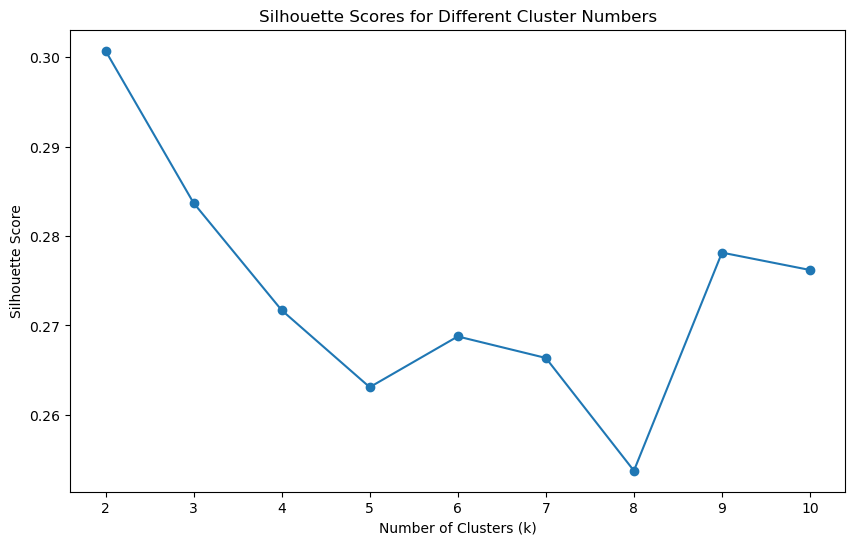

<Figure size 1200x1000 with 0 Axes>

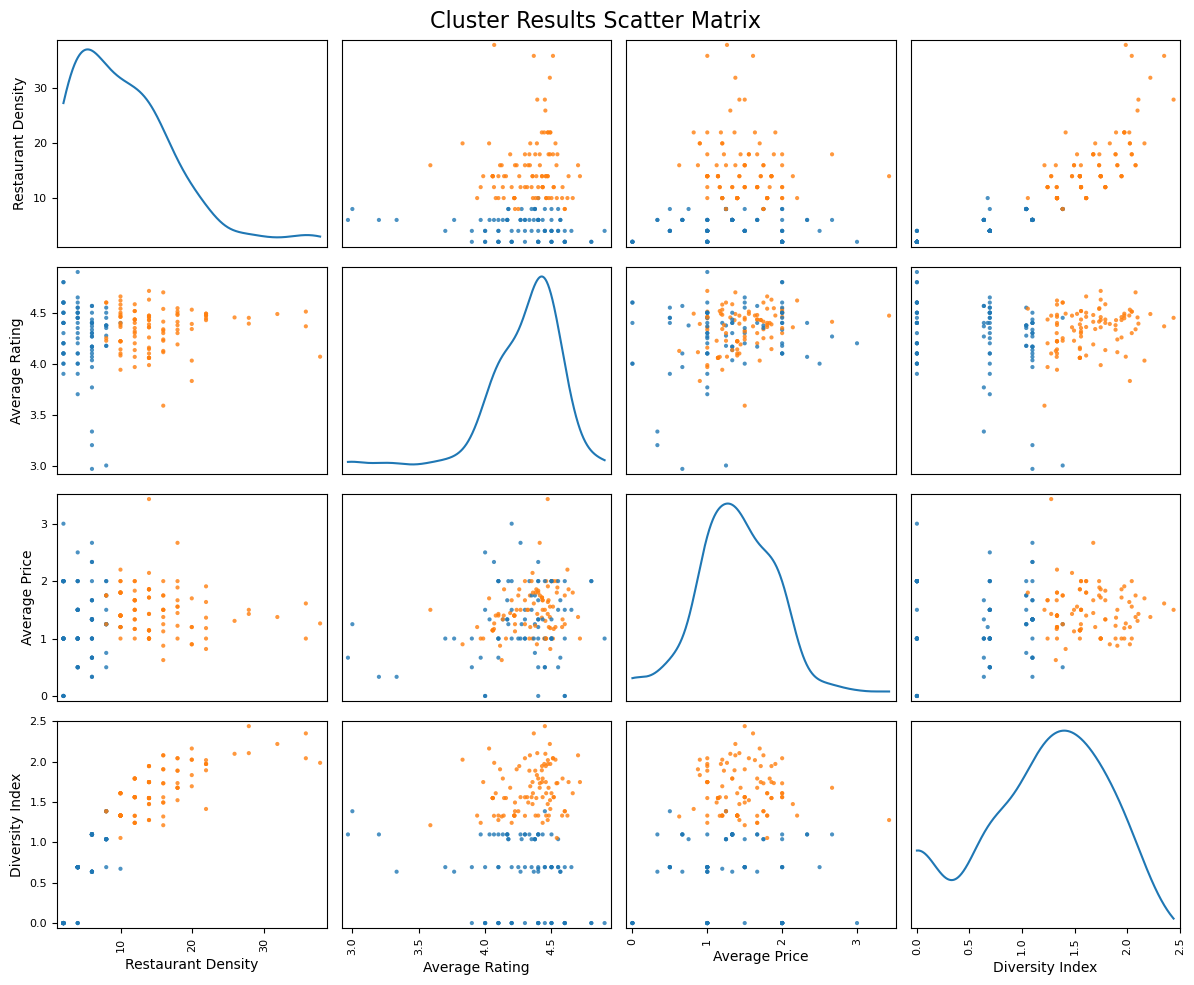

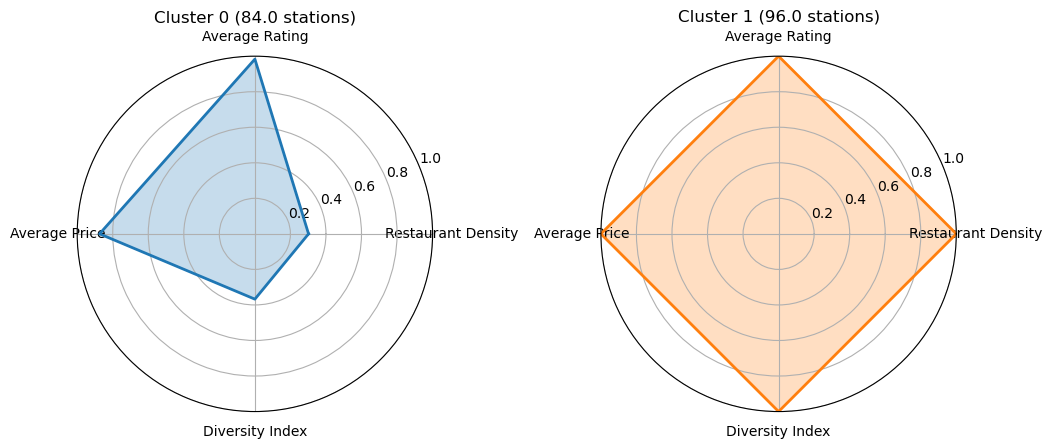

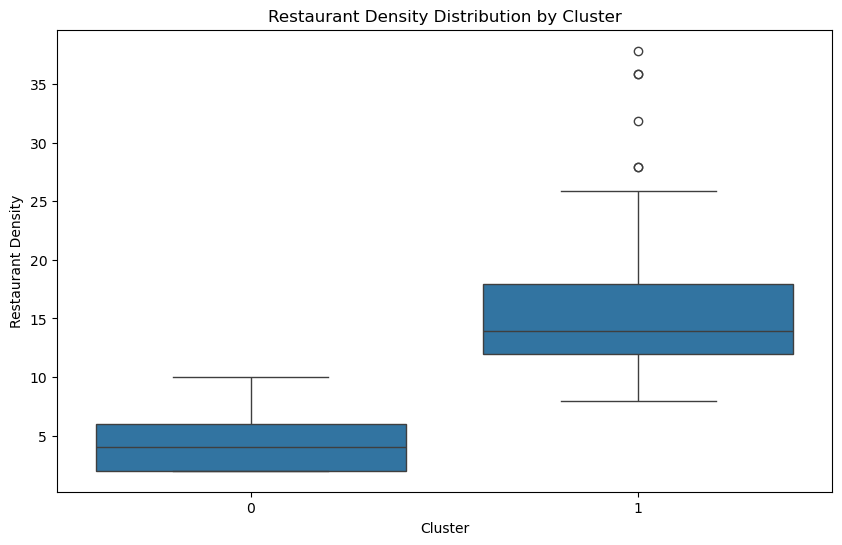

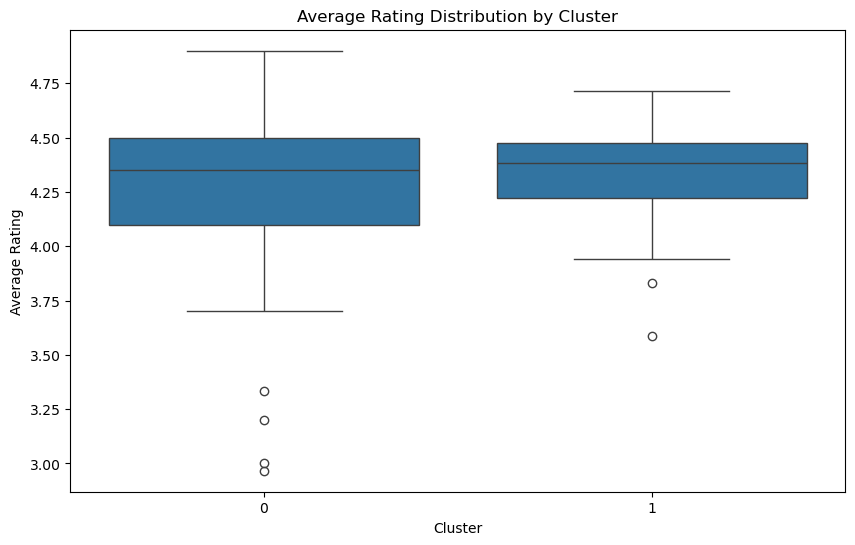

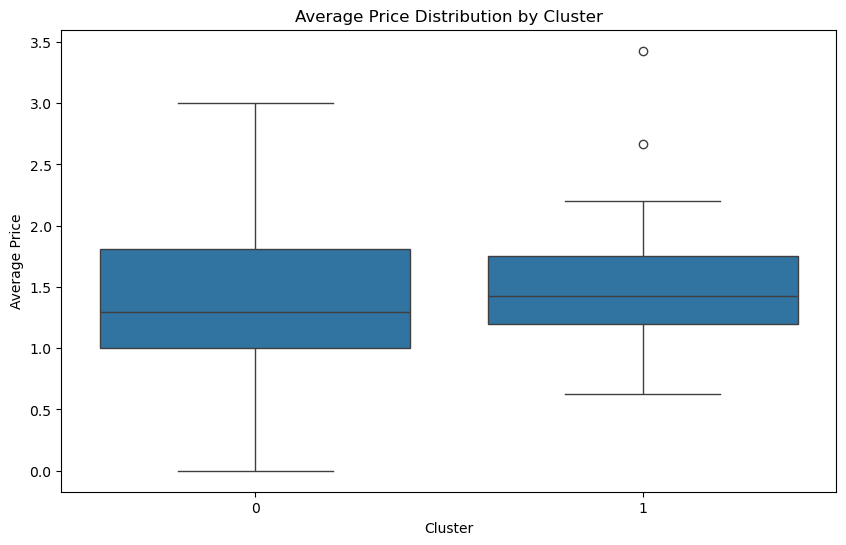

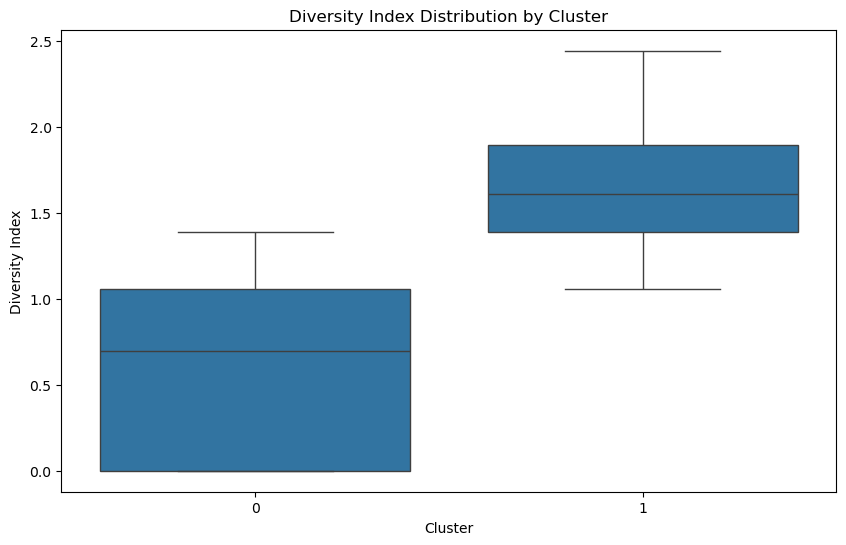

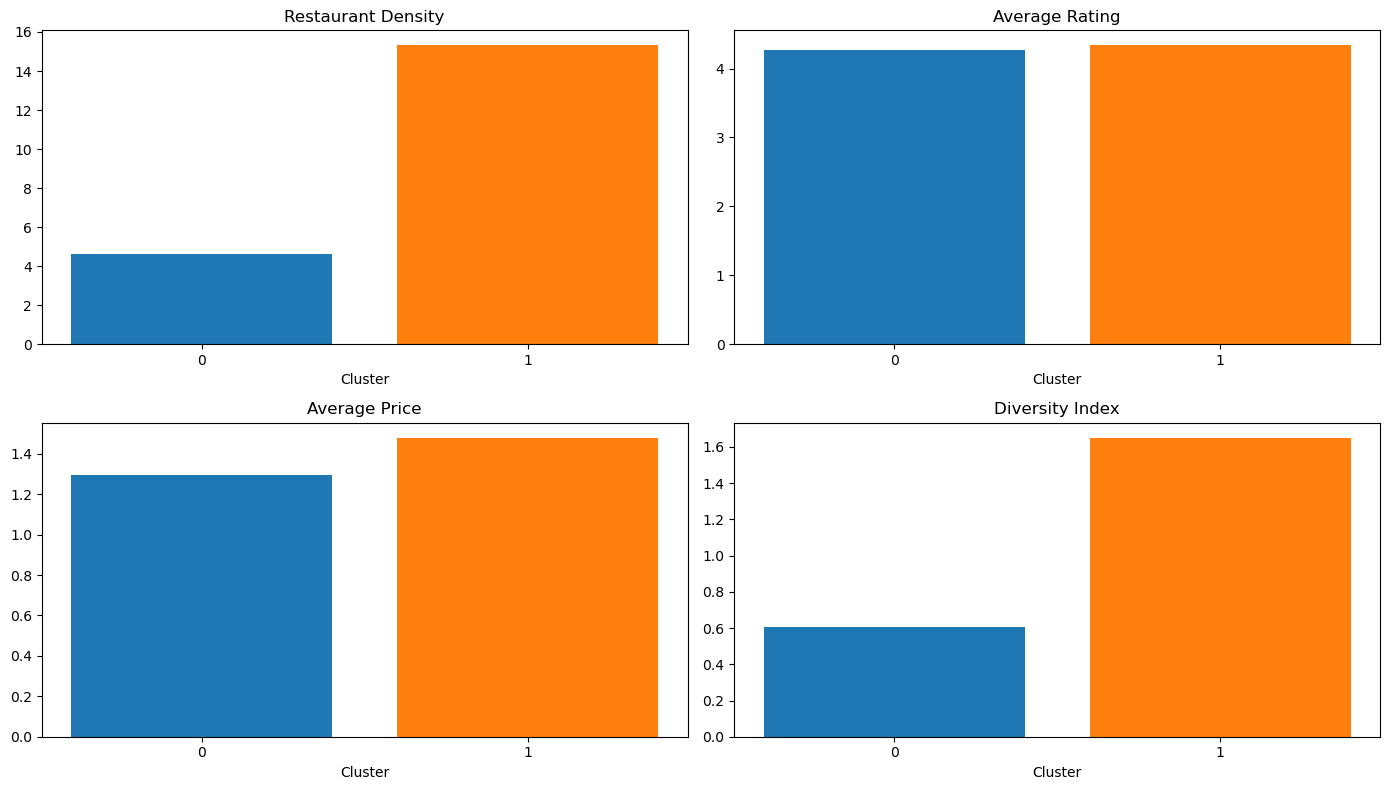

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def perform_station_clustering(stations_df, n_clusters_range=(2, 10)):
    """
    Perform clustering analysis on subway stations
    
    Parameters:
    stations_df: DataFrame containing station metrics
    n_clusters_range: Range of cluster numbers to try, default (2, 10)
    
    Returns:
    stations_df: DataFrame with added cluster labels
    cluster_profiles: DataFrame with cluster feature descriptions
    """
    print("Starting station clustering analysis...")
    
    # Select features for clustering
    features = [
        'restaurant_density',   # Restaurant density (spatial dimension)
        'avg_rating',           # Average rating (quality dimension)
        'avg_price_level',      # Average price level (price dimension)
        'food_diversity'    # food diversity index (diversity dimension)
    ]
    
    # Prepare clustering data, filter out stations with no restaurants
    stations_with_restaurants = stations_df[stations_df['nearby_restaurant_count'] > 0].copy()
    cluster_data = stations_with_restaurants[features].copy()
    
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    
    # Find optimal number of clusters
    silhouette_scores = []
    k_range = range(n_clusters_range[0], n_clusters_range[1] + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(scaled_data)
        
        # Calculate silhouette coefficient
        if len(np.unique(cluster_labels)) > 1:  # Ensure at least 2 clusters
            score = silhouette_score(scaled_data, cluster_labels)
            silhouette_scores.append(score)
            print(f"Number of clusters k={k}, silhouette score={score:.4f}")
        else:
            silhouette_scores.append(-1)
    
    # Plot silhouette coefficient curve to help determine optimal cluster number
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Cluster Numbers')
    plt.savefig('silhouette_scores.png')
    
    # Find best number of clusters
    best_k_idx = np.argmax(silhouette_scores)
    best_k = k_range[best_k_idx]
    print(f"Optimal number of clusters: k={best_k}, silhouette score={silhouette_scores[best_k_idx]:.4f}")
    
    # Use optimal cluster number for clustering
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    stations_with_restaurants['cluster'] = kmeans.fit_predict(scaled_data)
    
    # Initialize cluster labels for all stations (including those without restaurants)
    stations_df['cluster'] = -1  # Default -1 (stations without restaurants)
    
    # Update cluster labels for stations with restaurants
    for idx, row in stations_with_restaurants.iterrows():
        stations_df.loc[stations_df['Station ID'] == row['Station ID'], 'cluster'] = row['cluster']
    
    # Analyze features of each cluster
    cluster_profiles = stations_with_restaurants.groupby('cluster').agg({
        'Stop Name': 'count',
        'restaurant_density': ['mean', 'median', 'std'],
        'avg_rating': ['mean', 'median', 'std'],
        'avg_price_level': ['mean', 'median', 'std'],
        'food_diversity': ['mean', 'median', 'std'],
        'nearby_restaurant_count': ['mean', 'median', 'sum'],
        'annual_ridership': ['mean', 'median', 'sum']
    })
    
    # Flatten multi-level index
    cluster_profiles.columns = ['_'.join(col).strip('_') for col in cluster_profiles.columns.values]
    cluster_profiles.rename(columns={'Stop Name_count': 'station_count'}, inplace=True)
    
    # Visualize clustering results
    visualize_clusters(stations_with_restaurants, features, cluster_profiles)
    
    # Create cluster feature descriptions
    cluster_profiles['cluster_name'] = create_cluster_names(cluster_profiles, features)
    
    # Add cluster names to original DataFrame
    cluster_name_dict = dict(zip(cluster_profiles.index, cluster_profiles['cluster_name']))
    stations_df['cluster_name'] = stations_df['cluster'].map(
        lambda x: cluster_name_dict.get(x, "No Restaurant Station")
    )
    
    print("Station clustering analysis completed.")
    return stations_df, cluster_profiles

def create_cluster_names(cluster_profiles, features):
    """
    Create descriptive names for each cluster
    
    Parameters:
    cluster_profiles: DataFrame with cluster features
    features: List of features used for clustering
    
    Returns:
    cluster_names: List of cluster names
    """
    # Get median of each feature to determine high/low
    density_median = cluster_profiles['restaurant_density_median'].median()
    rating_median = cluster_profiles['avg_rating_median'].median()
    price_median = cluster_profiles['avg_price_level_median'].median()
    diversity_median = cluster_profiles['food_diversity_median'].median()
    
    cluster_names = []
    
    for idx, cluster in cluster_profiles.iterrows():
        # Determine level for each dimension
        density_level = "High Density" if cluster['restaurant_density_median'] > density_median else "Low Density"
        rating_level = "High Rating" if cluster['avg_rating_median'] > rating_median else "Average Rating"
        price_level = "High Price" if cluster['avg_price_level_median'] > price_median else "Affordable"
        diversity_level = "Diverse" if cluster['food_diversity_median'] > diversity_median else "Specialized"
        
        # Identify most significant features
        features_list = []
        
        if cluster['restaurant_density_median'] > (cluster_profiles['restaurant_density_median'].mean() + 
                                                  0.5 * cluster_profiles['restaurant_density_median'].std()):
            features_list.append("Dense Dining Area")
            
        if cluster['avg_rating_median'] > (cluster_profiles['avg_rating_median'].mean() + 
                                          0.5 * cluster_profiles['avg_rating_median'].std()):
            features_list.append("Quality Dining Area")
            
        if cluster['avg_price_level_median'] > (cluster_profiles['avg_price_level_median'].mean() + 
                                              0.5 * cluster_profiles['avg_price_level_median'].std()):
            features_list.append("Upscale Dining Area")
            
        if cluster['food_diversity_median'] > (cluster_profiles['food_diversity_median'].mean() + 
                                                 0.5 * cluster_profiles['food_diversity_median'].std()):
            features_list.append("Diverse Dining Area")
        
        # If no significant features, use composite description
        if not features_list:
            name = f"{density_level}-{rating_level}-{price_level}-{diversity_level} Dining Area"
        else:
            name = " & ".join(features_list)
        
        cluster_names.append(name)
    
    return cluster_names

def visualize_clusters(stations_df, features, cluster_profiles):
    """
    Visualize clustering results
    
    Parameters:
    stations_df: Station DataFrame with clustering information
    features: List of features used for clustering
    cluster_profiles: DataFrame with cluster features
    """
    # Set cluster colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    # 1. Cluster scatter plot matrix
    feature_labels = {
        'restaurant_density': 'Restaurant Density',
        'avg_rating': 'Average Rating',
        'avg_price_level': 'Average Price',
        'food_diversity': 'Diversity Index'
    }
    
    # Add cluster column for color mapping
    scatter_data = stations_df[features + ['cluster']].copy()
    scatter_data.rename(columns=feature_labels, inplace=True)
    
    # Draw scatter plot matrix
    plt.figure(figsize=(12, 10))
    scatter_matrix = pd.plotting.scatter_matrix(
        scatter_data.drop('cluster', axis=1), 
        c=scatter_data['cluster'].map(lambda x: colors[x % len(colors)]),
        figsize=(12, 10), 
        diagonal='kde',
        alpha=0.8
    )
    plt.suptitle('Cluster Results Scatter Matrix', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig('cluster_scatter_matrix.png')
    
    # 2. Cluster radar charts
    n_clusters = len(cluster_profiles)
    feature_names = ['Restaurant Density', 'Average Rating', 'Average Price', 'Diversity Index']
    
    # Create radar charts
    plt.figure(figsize=(15, 10))
    
    for i in range(min(n_clusters, 6)):  # Show max 6 clusters
        if i >= n_clusters:
            break
            
        ax = plt.subplot(2, 3, i+1, polar=True)
        
        # Prepare data
        values = [
            cluster_profiles.iloc[i]['restaurant_density_mean'] / cluster_profiles['restaurant_density_mean'].max(),
            cluster_profiles.iloc[i]['avg_rating_mean'] / cluster_profiles['avg_rating_mean'].max(),
            cluster_profiles.iloc[i]['avg_price_level_mean'] / cluster_profiles['avg_price_level_mean'].max(),
            cluster_profiles.iloc[i]['food_diversity_mean'] / cluster_profiles['food_diversity_mean'].max()
        ]
        
        # Ensure values in 0-1 range
        values = [max(0, min(v, 1)) for v in values]
        
        # Connect first and last points
        values.append(values[0])
        
        # Calculate angles
        angles = [n / float(len(feature_names)) * 2 * np.pi for n in range(len(feature_names))]
        angles.append(angles[0])  # Close the shape
        
        # Draw radar chart
        ax.plot(angles, values, linewidth=2, color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])
        
        # Set ticks and labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(feature_names)
        
        # Set title
        stations_count = cluster_profiles.iloc[i]['station_count']
        ax.set_title(f'Cluster {i} ({stations_count} stations)', size=12)
        
        # Set axis range and grid
        ax.set_ylim(0, 1)
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('cluster_radar_charts.png')
    
    # 3. Cluster boxplots comparison
    for feature, label in feature_labels.items():
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster', y=feature, data=stations_df)
        plt.title(f'{label} Distribution by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(label)
        plt.savefig(f'cluster_boxplot_{feature}.png')
    
    # 4. Cluster feature bar charts
    cluster_means = stations_df.groupby('cluster')[features].mean().reset_index()
    
    plt.figure(figsize=(14, 8))
    
    # Draw bar chart for each feature
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i+1)
        bars = plt.bar(
            cluster_means['cluster'], 
            cluster_means[feature], 
            color=[colors[int(c) % len(colors)] for c in cluster_means['cluster']]
        )
        plt.title(feature_labels[feature])
        plt.xlabel('Cluster')
        plt.xticks(cluster_means['cluster'])
    
    plt.tight_layout()
    plt.savefig('cluster_feature_bars.png')

    
# Perform clustering analysis
stations_df, cluster_profiles = perform_station_clustering(stations_with_inform)

# View clustering results
print("Cluster profile description:")
print(cluster_profiles[['station_count', 'restaurant_density_mean', 'avg_rating_mean', 
                       'avg_price_level_mean', 'food_diversity_mean', 'cluster_name']])

# Display sample stations for each cluster
for cluster in sorted(stations_df['cluster'].unique()):
    if cluster == -1:
        continue  # Skip stations with no nearby restaurants
    
    print(f"\nCluster {cluster} ({cluster_profiles.loc[cluster, 'cluster_name']}) sample stations:")
    # Select the top 5 stations in this cluster with the most nearby restaurants
    top_stations = stations_df[stations_df['cluster'] == cluster].sort_values(
        'nearby_restaurant_count', ascending=False).head(5)
    
    for _, station in top_stations.iterrows():
        print(f"  - {station['Stop Name']}: {station['nearby_restaurant_count']} restaurants, " 
              f"Density: {station['restaurant_density']:.1f}, Rating: {station['avg_rating']:.1f}")


## Specific Analysis

In [43]:
stations_df.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,avg_price_level,price_level_0_ratio,price_level_1_ratio,price_level_2_ratio,price_level_3_ratio,price_level_4_ratio,food_diversity,dominant_food,cluster,cluster_name
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,1.636364,0.090909,0.181818,0.727273,0.0,0.0,2.019815,italian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,1.250000,0.000000,0.750000,0.250000,0.0,0.0,1.039721,chinese_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,1.250000,0.250000,0.250000,0.500000,0.0,0.0,1.559581,mexican_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,1.307692,0.230769,0.230769,0.538462,0.0,0.0,2.098147,chinese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,1.444444,0.000000,0.555556,0.444444,0.0,0.0,1.676988,indian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...


In [44]:
def analyze_top_stations(stations_df, n=10):
    """
    Analyze top N stations by ridership
    
    Parameters:
    stations_df: Station DataFrame with clustering information
    n: Number of top stations to analyze, default 10
    """
    # Select top N stations by ridership
    top_stations = stations_df.nlargest(n, 'annual_ridership')
    
    # Create analysis for each top station
    for idx, station in top_stations.iterrows():
        plt.figure(figsize=(15, 10))
        
        # 1. Station information panel
        plt.subplot(2, 2, 1)
        info_text = f"""
        Station: {station['Stop Name']}
        Cluster: {station.get('cluster_name', 'Not clustered')}
        
        Annual Ridership: {station['annual_ridership']:,.0f}
        Nearby Restaurants: {station['nearby_restaurant_count']}
        Restaurant Density: {station['restaurant_density']:.2f}
        
        Cuisine Quality:
        - Average Rating: {station['avg_rating']:.2f}/5.0
        - Average Price: {station['avg_price_level']:.2f}/4.0
        - Diversity Index: {station['food_diversity']:.2f}
        """
        plt.text(0.1, 0.5, info_text, fontsize=12, verticalalignment='center')
        plt.axis('off')
        plt.title(f"Top Station Analysis: {station['Stop Name']}")
        
        # 2. Compare with city average using radar chart
        plt.subplot(2, 2, 2, polar=True)
        
        # Features to compare
        features = ['restaurant_density', 'avg_rating', 'avg_price_level', 'food_diversity']
        feature_names = ['Restaurant Density', 'Average Rating', 'Average Price', 'Diversity Index']
        
        # Get station values and city average values
        station_values = []
        city_avg_values = []
        max_values = []
        
        for feature in features:
            # Get station value with safety check
            station_val = station.get(feature, 0)
            # Get city average with safety check
            city_avg = stations_df[feature].mean()
            # Get max value for normalization with safety check
            max_val = stations_df[feature].max()
            
            # Store values
            station_values.append(float(station_val))
            city_avg_values.append(float(city_avg))
            max_values.append(float(max_val) if max_val > 0 else 1.0)  # Avoid division by zero
        
        # Normalize values (convert to 0-1 scale)
        station_norm = [float(s)/float(m) if m > 0 else 0 for s, m in zip(station_values, max_values)]
        city_avg_norm = [float(c)/float(m) if m > 0 else 0 for c, m in zip(city_avg_values, max_values)]
        
        # Add first point at the end to close the loop
        station_norm.append(station_norm[0])
        city_avg_norm.append(city_avg_norm[0])
        feature_names_display = feature_names.copy()
        feature_names_display.append(feature_names[0])
        
        # Calculate angles
        angles = [n / float(len(features)) * 2 * np.pi for n in range(len(features))]
        angles.append(angles[0])  # Close the loop
        
        # Plot radar chart
        ax = plt.subplot(2, 2, 2, polar=True)
        ax.plot(angles, station_norm, 'o-', linewidth=2, color='r', label=station['Stop Name'])
        ax.fill(angles, station_norm, 'r', alpha=0.25)
        ax.plot(angles, city_avg_norm, 'o-', linewidth=2, color='b', label='City Average')
        ax.fill(angles, city_avg_norm, 'b', alpha=0.1)
        
        # Set labels and title
        ax.set_thetagrids([a * 180/np.pi for a in angles[:-1]], feature_names_display[:-1])
        ax.set_ylim(0, 1)
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        plt.title(f"Comparison with City Average")
        
        # 3. Restaurant count comparison (Top 10 stations)
        plt.subplot(2, 2, 3)
        counts = []
        labels = []
        for i, (idx2, top_station) in enumerate(top_stations.iterrows()):
            counts.append(top_station['nearby_restaurant_count'])
            labels.append(top_station['Stop Name'])
            if i == 9:  # Only show current station + top 9 others
                break
        
        y_pos = np.arange(len(labels))
        current_idx = list(labels).index(station['Stop Name'])
        colors = ['red' if i == current_idx else 'skyblue' for i in range(len(labels))]
        
        plt.barh(y_pos, counts, color=colors)
        plt.yticks(y_pos, labels)
        plt.xlabel('Number of Nearby Restaurants')
        plt.title('Restaurant Count Comparison')
        
        # 4. Diversity comparison (Top 10 stations)
        plt.subplot(2, 2, 4)
        diversity = []
        for i, (idx2, top_station) in enumerate(top_stations.iterrows()):
            diversity.append(top_station['food_diversity'])
            if i == 9:
                break
        
        plt.barh(y_pos, diversity, color=colors)
        plt.yticks(y_pos, labels)
        plt.xlabel('Food Diversity Index')
        plt.title('Diversity Index Comparison')
        
        plt.tight_layout()
        plt.savefig(f"top_station_{station['Station ID']}.png")
        plt.close()
    
    print(f"Analysis completed for top {n} stations by ridership.")
    return top_stations


def compare_stations(stations_df, station_id1, station_id2):
    """
    Create comparison visualization between two stations
    
    Parameters:
    stations_df: Station DataFrame
    station_id1: ID of first station to compare
    station_id2: ID of second station to compare
    """
    # Get station data
    station1 = stations_df[stations_df['Station ID'] == station_id1].iloc[0]
    station2 = stations_df[stations_df['Station ID'] == station_id2].iloc[0]
    
    plt.figure(figsize=(15, 10))
    
    # 1. Basic information comparison
    plt.subplot(2, 2, 1)
    metrics = ['nearby_restaurant_count', 'restaurant_density', 'avg_rating', 
              'avg_price_level', 'food_diversity', 'annual_ridership']
    labels = ['Restaurant Count', 'Restaurant Density', 'Average Rating', 
             'Average Price', 'Diversity Index', 'Annual Ridership']
    
    x = np.arange(len(labels))
    width = 0.35
    
    values1 = []
    values2 = []
    
    for metric in metrics:
        # Get values with safety checks
        val1 = float(station1.get(metric, 0))
        val2 = float(station2.get(metric, 0))
        
        # Scale ridership values for better visualization
        if metric == 'annual_ridership':
            val1 = val1 / 1000000  # Scale to millions
            val2 = val2 / 1000000
        
        values1.append(val1)
        values2.append(val2)
    
    plt.bar(x - width/2, values1, width, label=station1['Stop Name'])
    plt.bar(x + width/2, values2, width, label=station2['Stop Name'])
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.title('Station Metrics Comparison')
    
    # 2. Radar chart comparison
    plt.subplot(2, 2, 2, polar=True)
    features = ['restaurant_density', 'avg_rating', 'avg_price_level', 'food_diversity']
    feature_names = ['Restaurant Density', 'Average Rating', 'Average Price', 'Diversity Index']
    
    # Get station values
    s1_values = []
    s2_values = []
    max_values = []
    
    for feature in features:
        # Get values with safety checks
        s1_val = float(station1.get(feature, 0))
        s2_val = float(station2.get(feature, 0))
        max_val = float(stations_df[feature].max() if stations_df[feature].max() > 0 else 1.0)
        
        s1_values.append(s1_val)
        s2_values.append(s2_val)
        max_values.append(max_val)
    
    # Normalize values
    s1_norm = [s/m for s, m in zip(s1_values, max_values)]
    s2_norm = [s/m for s, m in zip(s2_values, max_values)]
    
    # Add first element to close the loop
    s1_norm.append(s1_norm[0])
    s2_norm.append(s2_norm[0])
    feature_names.append(feature_names[0])
    
    # Calculate angles
    angles = [n / float(len(features)) * 2 * np.pi for n in range(len(features))]
    angles.append(angles[0])
    
    # Plot radar chart
    ax = plt.subplot(2, 2, 2, polar=True)
    ax.plot(angles, s1_norm, 'o-', linewidth=2, label=station1['Stop Name'])
    ax.fill(angles, s1_norm, alpha=0.25)
    ax.plot(angles, s2_norm, 'o-', linewidth=2, label=station2['Stop Name'])
    ax.fill(angles, s2_norm, alpha=0.25)
    
    # Set labels and title
    ax.set_thetagrids([a * 180/np.pi for a in angles[:-1]], feature_names[:-1])
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title('Station Features Comparison')
    
    # 3. Restaurant type comparison (if data available)
    plt.subplot(2, 2, 3)
    if station1.get('dominant_food') and station2.get('dominant_food'):
        # If dominant food type data is available
        plt.text(0.5, 0.5, 
                f"Dominant Food Types:\n\n{station1['Stop Name']}: {station1['dominant_food']}\n\n{station2['Stop Name']}: {station2['dominant_food']}",
                ha='center', va='center')
    else:
        # If price level ratio data is available
        price_features = [col for col in station1.index if 'price_level_' in col and '_ratio' in col]
        if price_features:
            price_labels = ['$', '$$', '$$$', '$$$$']
            
            # Create grouped bar chart for price distribution
            price_values1 = [station1.get(f, 0) for f in price_features]
            price_values2 = [station2.get(f, 0) for f in price_features]
            
            x = np.arange(len(price_labels[:len(price_features)]))
            width = 0.35
            
            plt.bar(x - width/2, price_values1, width, label=station1['Stop Name'])
            plt.bar(x + width/2, price_values2, width, label=station2['Stop Name'])
            plt.xticks(x, price_labels[:len(price_features)])
            plt.legend()
            plt.title('Price Distribution Comparison')
        else:
            plt.text(0.5, 0.5, "No detailed restaurant type data available", ha='center', va='center')
    plt.axis('off')
    
    # 4. Additional information
    plt.subplot(2, 2, 4)
    info_text = f"""
    Comparison Summary:
    
    {station1['Stop Name']}:
    - Cluster: {station1.get('cluster_name', 'Not clustered')}
    - Annual Ridership: {station1['annual_ridership']:,.0f}
    - Restaurant Count: {station1['nearby_restaurant_count']}
    - Rating: {station1['avg_rating']:.2f}/5.0
    
    {station2['Stop Name']}:
    - Cluster: {station2.get('cluster_name', 'Not clustered')}
    - Annual Ridership: {station2['annual_ridership']:,.0f}
    - Restaurant Count: {station2['nearby_restaurant_count']}
    - Rating: {station2['avg_rating']:.2f}/5.0
    
    Difference:
    - Ridership: {abs(station1['annual_ridership'] - station2['annual_ridership']):,.0f}
    - Restaurant Count: {abs(station1['nearby_restaurant_count'] - station2['nearby_restaurant_count'])}
    - Rating: {abs(station1['avg_rating'] - station2['avg_rating']):.2f}
    """
    plt.text(0.1, 0.5, info_text, fontsize=12, verticalalignment='center')
    plt.axis('off')
    plt.title('Comparison Summary')
    
    plt.tight_layout()
    plt.savefig(f"station_comparison_{station_id1}_vs_{station_id2}.png")
    
    print(f"Comparison completed for stations {station1['Stop Name']} and {station2['Stop Name']}.")
    return station1, station2

# 使用示例
top10 = analyze_top_stations(stations_df, n=10)

Analysis completed for top 10 stations by ridership.


In [45]:
top10_stations = stations_df.nlargest(10, 'annual_ridership')
top10_stations

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,avg_price_level,price_level_0_ratio,price_level_1_ratio,price_level_2_ratio,price_level_3_ratio,price_level_4_ratio,food_diversity,dominant_food,cluster,cluster_name
165,A28,164,164,IND,8th Av - Fulton St,34 St-Penn Station,M,True,"[A, C, E]",Subway,...,2.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.693147,mexican_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
322,128,318,318,IRT,Broadway - 7Av,34 St-Penn Station,M,True,"[1, 2, 3]",Subway,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.693147,mexican_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
451,701,447,447,IRT,Flushing,Flushing-Main St,Q,False,[7],Subway,...,1.263158,0.157895,0.421053,0.421053,0.000000,0.000000,1.986267,japanese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
11,R17,12,607,BMT,Broadway - Brighton,34 St-Herald Sq,M,True,"[N, Q, R, W]",Subway,...,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,japanese_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
231,D17,227,607,IND,6th Av - Culver,34 St-Herald Sq,M,True,"[B, D, F, M]",Subway,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,-1,No Restaurant Station
229,D15,225,225,IND,6th Av - Culver,47-50 Sts-Rockefeller Ctr,M,True,"[B, D, F, M]",Subway,...,1.833333,0.166667,0.166667,0.500000,0.000000,0.166667,1.791759,japanese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
401,626,397,397,IRT,Lexington Av,86 St,M,False,"[4, 5, 6]",Subway,...,1.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.636514,hamburger_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
406,631,402,610,IRT,Lexington Av,Grand Central-42 St,M,True,"[4, 5, 6]",Subway,...,1.714286,0.142857,0.142857,0.571429,0.142857,0.000000,1.747868,seafood_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
472,723,465,610,IRT,Flushing,Grand Central-42 St,M,True,[7],Subway,...,2.000000,0.000000,0.200000,0.600000,0.200000,0.000000,1.609438,japanese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
476,901,469,610,IRT,Lexington - Shuttle,Grand Central-42 St,M,True,[S],Subway,...,1.800000,0.400000,0.000000,0.200000,0.200000,0.200000,1.332179,sushi_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...


Comparison completed for stations 34 St-Penn Station and Flushing-Main St.


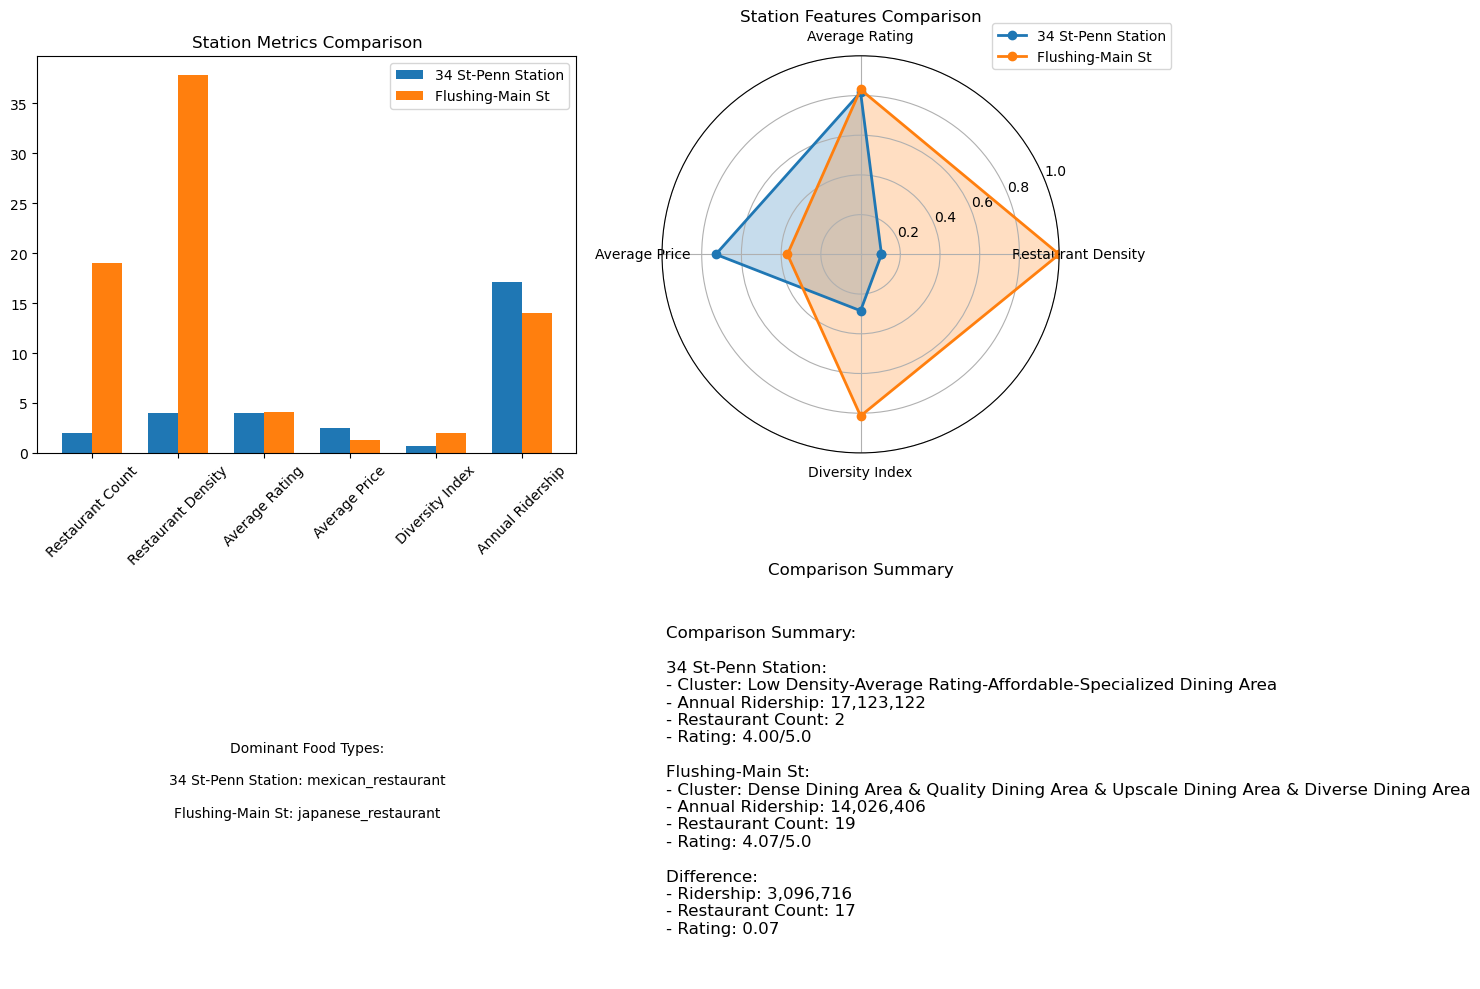

In [46]:
compare_result = compare_stations(stations_df, 164, 447)  

In [47]:
stations_df.to_csv('stations_with_metrics_and_clusters.csv', index=False)

In [48]:
stations_df.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,avg_price_level,price_level_0_ratio,price_level_1_ratio,price_level_2_ratio,price_level_3_ratio,price_level_4_ratio,food_diversity,dominant_food,cluster,cluster_name
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,1.636364,0.090909,0.181818,0.727273,0.0,0.0,2.019815,italian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,1.250000,0.000000,0.750000,0.250000,0.0,0.0,1.039721,chinese_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,1.250000,0.250000,0.250000,0.500000,0.0,0.0,1.559581,mexican_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,1.307692,0.230769,0.230769,0.538462,0.0,0.0,2.098147,chinese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,1.444444,0.000000,0.555556,0.444444,0.0,0.0,1.676988,indian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...


## Visualize

### Route.json

In [82]:
routes = gpd.read_file('subway_routes/subwaylines')
routes.head()

,id,name,objectid,rt_symbol,shape_len,url,geometry
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (-73.99488 40.6802, -73.99427 40.68..."
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,2000469.0,Q,755.0,N,1843.366331,http://web.mta.info/nyct/service/,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,2000294.0,M,756.0,B,1919.559203,http://web.mta.info/nyct/service/,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,2000296.0,M,757.0,B,2385.698536,http://web.mta.info/nyct/service/,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [83]:
complement = gpd.read_file('subway_routes/complement_line')
complement.head()

,route_id,route_shor,route_long,group_,SymbolID,Shape_Leng,geometry
0,SI,SIR,Staten Island Railway,SIR,None,30364.614887,"LINESTRING (-8265691 4940739, -8265527 4940876..."


In [84]:
complement = complement.rename(columns={'route_id': 'id', 
                                     'route_shor': 'name', 
                                     'group_': 'objectid',
                                     'SymbolID': 'rt_symbol',
                                     'Shape_Leng': 'shape_len',
                                     'route_long': 'url'})

complement.head()

,id,name,url,objectid,rt_symbol,shape_len,geometry
0,SI,SIR,Staten Island Railway,SIR,None,30364.614887,"LINESTRING (-8265691 4940739, -8265527 4940876..."


In [85]:
routes = routes.to_crs(epsg=4326)
complement = complement.to_crs(epsg=4326)
routes = pd.concat([routes, complement], ignore_index=True)
routes.head()

,id,name,objectid,rt_symbol,shape_len,url,geometry
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (-73.99488 40.6802, -73.99427 40.68..."
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,2000469.0,Q,755.0,N,1843.366331,http://web.mta.info/nyct/service/,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,2000294.0,M,756.0,B,1919.559203,http://web.mta.info/nyct/service/,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,2000296.0,M,757.0,B,2385.698536,http://web.mta.info/nyct/service/,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [86]:
routes = routes[['name', 'objectid', 'shape_len','geometry']]
routes.head()

,name,objectid,shape_len,geometry
0,G,753.0,2438.200249,"LINESTRING (-73.99488 40.6802, -73.99427 40.68..."
1,G,754.0,3872.834411,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,Q,755.0,1843.366331,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,M,756.0,1919.559203,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,M,757.0,2385.698536,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


### Stations.json

In [87]:
stations_df['dominant_food'] = stations_df['dominant_food'].str.capitalize()
stations_df.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,...,avg_price_level,price_level_0_ratio,price_level_1_ratio,price_level_2_ratio,price_level_3_ratio,price_level_4_ratio,food_diversity,dominant_food,cluster,cluster_name
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,"[N, W]",Elevated,...,1.636364,0.090909,0.181818,0.727273,0.0,0.0,2.019815,Italian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,"[N, W]",Elevated,...,1.250000,0.000000,0.750000,0.250000,0.0,0.0,1.039721,Chinese_restaurant,0,Low Density-Average Rating-Affordable-Speciali...
2,R04,3,3,BMT,Astoria,30 Av,Q,False,"[N, W]",Elevated,...,1.250000,0.250000,0.250000,0.500000,0.0,0.0,1.559581,Mexican_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
3,R05,4,4,BMT,Astoria,Broadway,Q,False,"[N, W]",Elevated,...,1.307692,0.230769,0.230769,0.538462,0.0,0.0,2.098147,Chinese_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...
4,R06,5,5,BMT,Astoria,36 Av,Q,False,"[N, W]",Elevated,...,1.444444,0.000000,0.555556,0.444444,0.0,0.0,1.676988,Indian_restaurant,1,Dense Dining Area & Quality Dining Area & Upsc...


In [88]:
import json
import pandas as pd
import numpy as np

# Borough name mapping
borough_map = {
    'M': 'Manhattan',
    'Bk': 'Brooklyn',
    'Q': 'Queens',
    'Bx': 'Bronx',
    'SI': 'Staten Island'
}

# Create empty list to store processed station data
stations_data = []

# Process each station
for _, row in stations_df.iterrows():
    # Parse route data more robustly - using a try/except approach
    daytime_routes = []
    
    try:
        # Check if the cell contains a value that can be converted to a string
        route_text = str(row['Daytime Routes'])
        
        # Skip if it's NaN
        if route_text == 'nan' or route_text == 'None':
            pass
        # Handle case where the data is like "[N, W]" or "['N', 'W']"
        elif route_text.startswith('[') and route_text.endswith(']'):
            # Extract content between brackets
            inside_text = route_text[1:-1]
            # Split by comma and clean each item
            daytime_routes = [r.strip().strip("'\"") for r in inside_text.split(',')]
            daytime_routes = [r for r in daytime_routes if r]  # Remove empty strings
        else:
            # If it's a simple string like "N W", split by space
            daytime_routes = [r.strip() for r in route_text.split() if r.strip()]
    except:
        # If any error occurs, just use an empty list
        daytime_routes = []
    
    # Create station object with robust type checking
    try:
        station_id = int(row['Station ID']) if not isinstance(row['Station ID'], (pd.Series, np.ndarray)) and pd.notna(row['Station ID']) else None
    except:
        station_id = None
        
    try:
        station_name = str(row['Stop Name']) if pd.notna(row['Stop Name']) else "Unknown Station"
    except:
        station_name = "Unknown Station"
    
    try:
        borough = borough_map.get(row['Borough'], row['Borough']) if pd.notna(row['Borough']) else None
    except:
        borough = None
    
    try:
        latitude = float(row['GTFS Latitude']) if pd.notna(row['GTFS Latitude']) else None
    except:
        latitude = None
        
    try:
        longitude = float(row['GTFS Longitude']) if pd.notna(row['GTFS Longitude']) else None
    except:
        longitude = None
    
    # Create the station object with all the safe values
    station = {
        "id": station_id,
        "name": station_name,
        "borough": borough,
        "routes": daytime_routes,
        "coordinates": {
            "latitude": latitude,
            "longitude": longitude
        },
        "ridership": 0,  # We'll set these values separately with try/except blocks
        "foodMetrics": {
            "restaurantCount": 0,
            "avgRating": 0,
            "foodDiversity": 0,
            "dominantFood": None,
            "priceDistribution": {
                "level1": 0.25,
                "level2": 0.25,
                "level3": 0.25,
                "level4": 0.25
            }
        },
        "cluster": {
            "id": None,
            "name": "Unknown"
        }
    }
    
    # Safely add ridership
    try:
        if pd.notna(row['daily_avg_ridership']):
            station["ridership"] = round(float(row['daily_avg_ridership']), 2)
    except:
        pass
    
    # Safely add restaurant count
    try:
        if pd.notna(row['nearby_restaurant_count']):
            station["foodMetrics"]["restaurantCount"] = int(row['nearby_restaurant_count'])
    except:
        pass
    
    # Safely add average rating
    try:
        if pd.notna(row['avg_rating']):
            station["foodMetrics"]["avgRating"] = float(row['avg_rating'])
    except:
        pass
    
    # Safely add food diversity
    try:
        if pd.notna(row['food_diversity']):
            station["foodMetrics"]["foodDiversity"] = float(row['food_diversity'])
    except:
        pass
    
    # Safely add value index
    try:
        if pd.notna(row['avg_rating']) and pd.notna(row['avg_price_level']) and float(row['avg_price_level']) > 0:
            station["foodMetrics"]["valueIndex"] = float(row['avg_rating']) / float(row['avg_price_level'])
    except:
        pass
    
    # Safely add dominant food
    try:
        if pd.notna(row['dominant_food']):
            station["foodMetrics"]["dominantFood"] = row['dominant_food'].replace('_restaurant', '').replace('_', ' ')
    except:
        pass
    
    # Safely add price distributions
    try:
        if pd.notna(row['price_level_1_ratio']):
            station["foodMetrics"]["priceDistribution"]["level1"] = float(row['price_level_1_ratio'])
    except:
        pass
    
    try:
        if pd.notna(row['price_level_2_ratio']):
            station["foodMetrics"]["priceDistribution"]["level2"] = float(row['price_level_2_ratio'])
    except:
        pass
    
    try:
        if pd.notna(row['price_level_3_ratio']):
            station["foodMetrics"]["priceDistribution"]["level3"] = float(row['price_level_3_ratio'])
    except:
        pass
    
    try:
        if pd.notna(row['price_level_4_ratio']):
            station["foodMetrics"]["priceDistribution"]["level4"] = float(row['price_level_4_ratio'])
    except:
        pass
    
    # Safely add cluster info
    try:
        if pd.notna(row['cluster']):
            station["cluster"]["id"] = int(row['cluster'])
    except:
        pass
    
    try:
        if pd.notna(row['cluster_name']):
            station["cluster"]["name"] = row['cluster_name']
    except:
        pass
    
    stations_data.append(station)

# Convert data to JSON format and save
with open('nyc_subway_food/data/stations.json', 'w', encoding='utf-8') as f:
    json.dump(stations_data, f, ensure_ascii=False, indent=2)

print(f"Successfully generated stations.json file with {len(stations_data)} stations")

Successfully generated stations.json file with 502 stations


### Restaurants.json

In [89]:
import pandas as pd
import json
import geopandas as gpd
from shapely import wkt

# Create a subway line color mapping (based on official NYC subway colors)
route_colors = {
    '1': '#EE352E', '2': '#EE352E', '3': '#EE352E',  # Red line
    '4': '#00933C', '5': '#00933C', '6': '#00933C',  # Green line
    '7': '#B933AD',  # Purple line
    'A': '#0039A6', 'C': '#0039A6', 'E': '#0039A6',  # Blue line
    'B': '#FF6319', 'D': '#FF6319', 'F': '#FF6319', 'M': '#FF6319',  # Orange line
    'G': '#6CBE45',  # Light green line
    'J': '#996633', 'Z': '#996633',  # Brown line
    'L': '#A7A9AC',  # Gray line
    'N': '#FCCC0A', 'Q': '#FCCC0A', 'R': '#FCCC0A', 'W': '#FCCC0A',  # Yellow line
    'S': '#808183'  # Shuttle
}

# routes = pd.read_csv('subway_routes.csv')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(routes)

# If the geometry column contains WKT strings, convert them to geometry objects
if gdf['geometry'].dtype == 'object':
   gdf['geometry'] = gdf['geometry'].apply(lambda x: wkt.loads(x) if isinstance(x, str) else x)

# Set Coordinate Reference System to WGS84 (standard GPS coordinates)
gdf.crs = "EPSG:4326"

# Convert the GeoDataFrame to GeoJSON format
geojson_data = json.loads(gdf.to_json())

# Enhance GeoJSON features with custom properties
for feature in geojson_data['features']:
    # Get line name
    line_name = feature['properties']['name']
    
    # Add color information
    feature['properties']['color'] = route_colors.get(line_name, "#888888")
    
    # Add formatted line name
    feature['properties']['line_name'] = f"Line {line_name}"

# Save to a GeoJSON file
with open('nyc_subway_food/data/subway_lines.geojson', 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=2)

print(f"Successfully generated subway_lines.geojson with {len(geojson_data['features'])} subway lines.")

# Verify the structure of the generated GeoJSON file
try:
    with open('nyc_subway_food/data/subway_lines.geojson', 'r', encoding='utf-8') as f:
        test_geojson = json.load(f)
    
    if 'features' in test_geojson and len(test_geojson['features']) > 0:
        sample_feature = test_geojson['features'][0]
        if 'geometry' in sample_feature and 'properties' in sample_feature:
            geometry_type = sample_feature['geometry']['type']
            coords_count = len(sample_feature['geometry']['coordinates'])
            print(f"File structure is valid. First feature is a {geometry_type} with {coords_count} coordinate points.")
            
            if geometry_type == 'LineString' and coords_count >= 2:
                print("Coordinate points are sufficient. GeoJSON file is valid.")
            else:
                print(f"Warning: First feature may have insufficient coordinates. Type: {geometry_type}, Count: {coords_count}")
        else:
            print("Warning: Feature structure is incomplete. Missing 'geometry' or 'properties'.")
    else:
        print("Warning: GeoJSON file structure is invalid. Missing or empty 'features' array.")
except Exception as e:
    print(f"Error verifying GeoJSON file: {e}")

# Reminder for file placement
print("\nPlease place the generated 'subway_lines.geojson' file in the 'data' directory of your web application.")
print("Then ensure your 'map.js' script's drawSubwayLines function is configured to load this GeoJSON file.")


Successfully generated subway_lines.geojson with 743 subway lines.
File structure is valid. First feature is a LineString with 18 coordinate points.
Coordinate points are sufficient. GeoJSON file is valid.

Please place the generated 'subway_lines.geojson' file in the 'data' directory of your web application.
Then ensure your 'map.js' script's drawSubwayLines function is configured to load this GeoJSON file.


In [90]:
restaurants_gdf['cuisine_types'] = restaurants_gdf['cuisine_types'].str.capitalize()
restaurants_gdf.head()

,place_id,name,address,latitude,longitude,rating,user_ratings_total,price_level,area,cuisine_types,geometry
3,ChIJM6NLWapZwokR5Gj7tgBAfWo,Oohu Szechuan & Canton Cuisines,"128 West 36th Street, New York",40.751476,-73.988352,4.5,1293,2,Manhattan Midtown,Chinese_restaurant,POINT (987477.356 213059.928)
4,ChIJR9So-lRYwokRX1xEjA0rChA,Carmine's - Time Square,"200 West 44th Street, New York",40.757498,-73.986654,4.5,17249,2,Manhattan Midtown,Italian_restaurant,POINT (987947.398 215253.933)
6,ChIJR9legAFZwokRa1s5gcFXPZw,Grand Central Oyster Bar,"89 East 42nd Street, New York",40.752482,-73.977431,4.2,4267,2,Manhattan Midtown,Seafood_restaurant,POINT (990502.997 213427.074)
7,ChIJzz-PyFVYwokRwp5z0KduYls,Blue Fin,"1567 Broadway, New York",40.759376,-73.985325,4.2,1068,3,Manhattan Midtown,Seafood_restaurant,POINT (988315.417 215938.172)
8,ChIJhXAgf1NYwokRBzdqc2TRX_I,Shake Shack Theater District,"691 8th Avenue, New York",40.758410,-73.989219,4.4,14287,2,Manhattan Midtown,Hamburger_restaurant,POINT (987236.745 215586.288)


In [91]:
# Create an empty list to store processed restaurant data
restaurants_data = []

# Process each restaurant entry
for index, row in restaurants_gdf.iterrows():
    # Extract the main cuisine type from 'cuisine_types'
    cuisine = row['cuisine_types']
    if pd.notna(cuisine):
        # Remove '_restaurant' suffix and replace underscores with spaces
        clean_cuisine = cuisine.replace('_restaurant', '').replace('_', ' ')
    else:
        clean_cuisine = None
    
    # Build the restaurant data object
    restaurant = {
        "id": row['place_id'],
        "name": row['name'],
        "address": row['address'],
        "coordinates": {
            "latitude": row['latitude'],
            "longitude": row['longitude']
        },
        "rating": {
            "value": float(row['rating']) if pd.notna(row['rating']) else None,
            "user_count": int(row['user_ratings_total']) if pd.notna(row['user_ratings_total']) else 0
        },
        "priceLevel": int(row['price_level']) if pd.notna(row['price_level']) else None,
        "area": row['area'],
        "cuisine": {
            "type": clean_cuisine,
            "original": row['cuisine_types']
        }
    }

    # Optionally add distance to nearest station here if applicable
    # You can integrate this by referencing a 'stations.json' file or other linked spatial data

    restaurants_data.append(restaurant)

# Save the data to a JSON file
with open('nyc_subway_food/data/restaurants.json', 'w', encoding='utf-8') as f:
    json.dump(restaurants_data, f, ensure_ascii=False, indent=2)

print(f"Successfully generated 'restaurants.json' containing {len(restaurants_data)} restaurants.")


Successfully generated 'restaurants.json' containing 4636 restaurants.


In [92]:
from math import radians, cos, sin, asin, sqrt
import json

# Calculate the great-circle distance between two points using the Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # Apply the Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r * 1000  # Convert to meters

# Load subway station data from JSON
with open('nyc_subway_food/data/stations.json', 'r', encoding='utf-8') as f:
    stations_data = json.load(f)

# Attach nearest station information to each restaurant
for restaurant in restaurants_data:
    min_distance = float('inf')  # Initialize with a very large number
    nearest_station = None

    # Compare distance to all stations
    for station in stations_data:
        coords = station.get('coordinates', {})
        if 'latitude' in coords and 'longitude' in coords:
            distance = haversine(
                restaurant['coordinates']['longitude'],
                restaurant['coordinates']['latitude'],
                coords['longitude'],
                coords['latitude']
            )

            # Update the nearest station if this one is closer
            if distance < min_distance:
                min_distance = distance
                nearest_station = station

    # If the closest station is within 400 meters, attach it
    if nearest_station and min_distance <= 400:
        restaurant['nearestStation'] = {
            "id": nearest_station['id'],
            "name": nearest_station['name'],
            "distance": f"{round(min_distance)}m"
        }

# Save the updated restaurant data back to JSON
with open('nyc_subway_food/data/restaurants.json', 'w', encoding='utf-8') as f:
    json.dump(restaurants_data, f, ensure_ascii=False, indent=2)

print("Nearest subway station information has been added to each restaurant.")


Nearest subway station information has been added to each restaurant.
